## Load the data

In [1]:

import pandas as pd         
from pathlib import Path   

In [ ]:
data_dir='C:/Users/Clara_einfach/Clara/Tilburg/Master/Code/Dataset/WISDM'

In [ ]:
                                                                                        #name columns for two locations
accel_columns = ['user', 'activity', 'timestamp', 'accel_x', 'accel_y', 'accel_z']
gyro_columns = ['user', 'activity', 'timestamp', 'gyro_x', 'gyro_y', 'gyro_z']

                                                                                        #function to looop over files in directory
def load_files_from_directories(dirs):
    all_files = []
    for directory in dirs:
        path = Path(directory)
        all_files.extend(path.glob('*'))                                                # Load all files in the directory
    return all_files

                                                                                        #call locations and files
directories = [data_dir+'/accel', data_dir+'/gyro']
files = load_files_from_directories(directories)

                                                                                        #list for the dataframes
accel_dfs = []
gyro_dfs = []

                                                                                        #fill dataframes
for idx, directory in enumerate(directories):
    for file in Path(directory).glob('*'):
        if idx == 0:                                                                    # For accelerometer files
            df = pd.read_table(file, sep=',', header=None, names=accel_columns)
            accel_dfs.append(df)
        elif idx == 1:                                                                  # For gyroscope files
            df = pd.read_table(file, sep=',', header=None, names=gyro_columns)
            gyro_dfs.append(df)

                                                                                        #combine files for two dataframes each
full_accel_data = pd.concat(accel_dfs, ignore_index=True)
full_gyro_data = pd.concat(gyro_dfs, ignore_index=True)

                                                                                        #how long are the file?
print("shape file full accel data",full_accel_data.shape)
print("shape file full gyro data ",full_gyro_data.shape)

                                                                                        #merge to one on user, activity and timestamp
merged_data = pd.merge(full_accel_data, full_gyro_data, on=['user', 'activity', 'timestamp'], how='inner')

                                                                                        #check how many of the files could be matched:
matched_rows_count = merged_data.shape[0]
print(f"Number of matched rows: {matched_rows_count}")


                                                                                        #name final columns
final_columns = ['user',  'activity','timestamp', 'accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
merged_data = merged_data[final_columns]

print(merged_data)

shape file full accel data (4804403, 6)
shape file full gyro data  (3608635, 6)
Number of matched rows: 2909149
         user activity        timestamp   accel_x    accel_y       accel_z  \
0        1600        A  252207918580802 -4.332779  13.361191   -0.7188721;   
1        1600        A  252207968934806 -0.319443  13.318359  -0.23202515;   
2        1600        A  252208019288809  1.566452   9.515274  -0.01777649;   
3        1600        A  252208069642813 -0.323746   5.262665   0.32234192;   
4        1600        A  252208119996817 -1.811676   3.710510    1.3739319;   
...       ...      ...              ...       ...        ...           ...   
2909144  1650        S  357733977635000 -8.509504  -3.520679   -1.8226099;   
2909145  1650        S  357734017925000 -8.423284  -4.061953   -1.7603394;   
2909146  1650        S  357734058325000 -8.327483  -4.196074   -1.5711329;   
2909147  1650        S  357734098619000 -8.080796  -4.418811   -1.4154567;   
2909148  1650        S  357734

In [ ]:
                                                                                        #check matched files
total_accel_rows = full_accel_data.shape[0]
total_gyro_rows = full_gyro_data.shape[0]

                                                                                        # Number of matched rows
matched_rows_count = merged_data.shape[0]

                                                                                        # Calculate the percentage of matched rows based on full accel data
matched_percentage_accel = (matched_rows_count / total_accel_rows) * 100 

                                                                                        #  Calculate the percentage of matched rows based on full gyro data
matched_percentage_gyro = (matched_rows_count / total_gyro_rows) * 100 
                                                                                        # print 
print(f"Total rows in accelerometer data: {total_accel_rows}")
print(f"Total rows in gyroscope data: {total_gyro_rows}")
print(f"Matched rows count: {matched_rows_count}")
print(f"Percentage of matched rows for accelerometer data: {matched_percentage_accel:.2f}%")
print(f"Percentage of matched rows for gyroscope data: {matched_percentage_gyro:.2f}%")

Total rows in accelerometer data: 4804403
Total rows in gyroscope data: 3608635
Matched rows count: 2909149
Percentage of matched rows for accelerometer data: 60.55%
Percentage of matched rows for gyroscope data: 80.62%


#checking the files

In [4]:
                                                                       #counting the files for participants

count=0
for idx, directory in enumerate(directories):
    for file in Path(directory).glob('*'):

      count=count+1                                                    #checking the amount of files: 51gyro+51accel
print(count)
                                                                       #short check of different users
print(merged_data['user'].unique())                                    #merged 51



102
[1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613
 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627
 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641
 1642 1643 1644 1645 1646 1647 1648 1649 1650]


## selected activites from the dataset

In [5]:
                                                                        #select activities (walking, running, stairs, sitting, standing, kicking)
merged_data.info()
move6=merged_data[merged_data['activity'].isin(['A','B','C','D','E','M'])]
move6.info()                                                            #print type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909149 entries, 0 to 2909148
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       int64  
 1   activity   object 
 2   timestamp  int64  
 3   accel_x    float64
 4   accel_y    float64
 5   accel_z    object 
 6   gyro_x     float64
 7   gyro_y     float64
 8   gyro_z     object 
dtypes: float64(4), int64(2), object(3)
memory usage: 199.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 962598 entries, 0 to 2899401
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       962598 non-null  int64  
 1   activity   962598 non-null  object 
 2   timestamp  962598 non-null  int64  
 3   accel_x    962598 non-null  float64
 4   accel_y    962598 non-null  float64
 5   accel_z    962598 non-null  object 
 6   gyro_x     962598 non-null  float64
 7   gyro_y     962598 non-null  float64
 8   gyro_z     962598 non-null  object 
dty

# z_axis from object to float

In [6]:
                                                                                # the last column was separated with ; and will be removed 
move6['accel_z'] = move6['accel_z'].map(lambda x: x.rstrip(';'))
move6['accel_z'] = move6['accel_z'].astype(float)                               #and datatype transformed to float like other time series
move6['gyro_z'] = move6['gyro_z'].map(lambda x: x.rstrip(';'))
move6['gyro_z'] = move6['gyro_z'].astype(float)
move6.info()

C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1694462143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move6['accel_z'] = move6['accel_z'].map(lambda x: x.rstrip(';'))
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1694462143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move6['accel_z'] = move6['accel_z'].astype(float)                               #and datatype transformed to float like other time series
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\169446214

<class 'pandas.core.frame.DataFrame'>
Index: 962598 entries, 0 to 2899401
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       962598 non-null  int64  
 1   activity   962598 non-null  object 
 2   timestamp  962598 non-null  int64  
 3   accel_x    962598 non-null  float64
 4   accel_y    962598 non-null  float64
 5   accel_z    962598 non-null  float64
 6   gyro_x     962598 non-null  float64
 7   gyro_y     962598 non-null  float64
 8   gyro_z     962598 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 73.4+ MB


C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1694462143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move6['gyro_z'] = move6['gyro_z'].astype(float)


## training test split

In [7]:
                                                                #packages
from sklearn.model_selection import train_test_split

import numpy as np

In [ ]:
                                                                #three dataframes
train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

                                                                #iterate through users
for user in move6['user'].unique():
    user_data = move6[merged_data['user'] == user]

                                                                #iterate through activities for each user
    for activity in user_data['activity'].unique():
        activity_data = user_data[user_data['activity'] == activity]

                                                                #sorted by timestamp (important to keep sorted order for ts)
        activity_data = activity_data.sort_values(by='timestamp')

                                                                #calculate split index per person per activity
        train_index= int(len(activity_data)*0.6)
        val_index= int(len(activity_data)*0.8)

                                                                #split data by index
        train_split= activity_data.iloc[:train_index]
        val_split = activity_data.iloc[train_index:val_index]
        test_split = activity_data.iloc[val_index:]

                                                                #append to train, validation and test dataframes
        train_data = pd.concat([train_data, train_split], ignore_index=True)
        val_data = pd.concat([val_data,val_split],ignore_index=True)
        test_data = pd.concat([test_data, test_split], ignore_index=True)
                                                                #print overview
print("Training Data:")
print(train_data.head())
print("Validation Data:")
print(val_data.head())
print("Testing Data:")
print(test_data.head())

C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1864348213.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1864348213.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1864348213.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1864348213.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1864348213.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]


Training Data:
   user activity        timestamp   accel_x    accel_y   accel_z    gyro_x  \
0  1600        A  252207918580802 -4.332779  13.361191 -0.718872 -0.853210   
1  1600        A  252207968934806 -0.319443  13.318359 -0.232025 -0.875137   
2  1600        A  252208019288809  1.566452   9.515274 -0.017776 -0.720169   
3  1600        A  252208069642813 -0.323746   5.262665  0.322342 -0.571640   
4  1600        A  252208119996817 -1.811676   3.710510  1.373932 -0.380493   

     gyro_y    gyro_z  
0  0.297226  0.890182  
1  0.015472  0.162231  
2  0.388489 -0.284012  
3  1.227402 -0.241669  
4  1.202835 -0.213135  
Validation Data:
   user activity        timestamp   accel_x    accel_y   accel_z    gyro_x  \
0  1600        A  252315726504993 -1.022568  10.587906 -0.038254  0.483643   
1  1600        A  252315776858997 -4.283859  12.623840 -4.597519  0.093338   
2  1600        A  252315827213001 -6.712646  10.446396 -1.323807 -0.825363   
3  1600        A  252315877567005 -2.404923

C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_12676\1864348213.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]


## visualize

In [9]:
import matplotlib.pyplot as plt                     #packages

# visualization of training test split

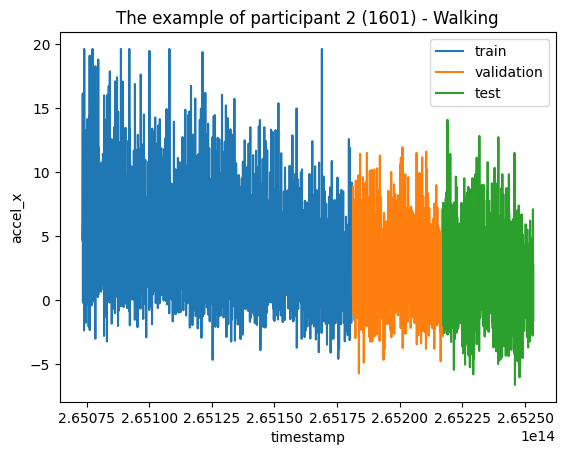

In [10]:
                                                                                            # data sample for one activity and one participant for three parts of the same ts
filteredtrain=train_data[(train_data['activity']=='A')&(train_data['user']==1601)]
filteredval=val_data[(val_data['activity']=='A')&(val_data['user']==1601)]
filteredtest=test_data[(test_data['activity']=='A')&(test_data['user']==1601)]
                                                                                            # plot accelerometer data on timestamp 
plt.plot(filteredtrain['timestamp'],filteredtrain['accel_x'],label='train')
plt.plot(filteredval['timestamp'], filteredval['accel_x'], label='validation')
plt.plot(filteredtest['timestamp'],filteredtest['accel_x'],label='test')
plt.legend()
plt.title("The example of participant 2 (1601) - Walking")
plt.xlabel("timestamp")
plt.ylabel("accel_x")
plt.show()

# visualize 
A=Walking, B=jogging, C=Stairs, D=Sitting, E=Standing, M=kicking

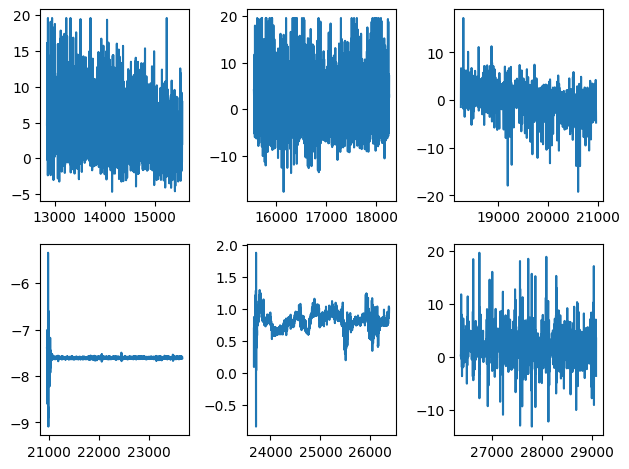

In [ ]:
                                                                #visualize activities with example accelerometer x train data for one participant (nr2) 1601

fig,ax=plt.subplots(2,3)
ax=ax.flatten()
activities= train_data['activity'].unique()                     # 
for i, activity in enumerate(activities):                       # loop over activities to make a graph for each
                                                                #filter data for user
  filtered=train_data[(train_data['activity']==activity)&(train_data['user']==1601)]
                                                                
  ax[i].plot(filtered.index,filtered['accel_x'] )               

plt.tight_layout()
plt.show()


 

## check missings

In [11]:

missi=train_data.isna().sum()
print(missi)

user         0
activity     0
timestamp    0
accel_x      0
accel_y      0
accel_z      0
gyro_x       0
gyro_y       0
gyro_z       0
dtype: int64


In [ ]:
                                                                                # copy of dataframe for next step
train_norm = train_data.copy()
val_norm = val_data.copy()
test_norm = test_data.copy()

## Features

In [ ]:
coordinates = ['accel_x','accel_y','accel_z','gyro_x','gyro_y','gyro_z']         # name of columns with raw data

In [ ]:
                                                                                # mean of windows over accel x,y,z, gyro x,y,z for train,val and test data
for dat in coordinates:                                                         # loop over all raw time series
  train_norm[f'{dat}_mean_rol']=train_norm[dat].rolling(window=120).mean()      # rolling mean for training data
  val_norm[f'{dat}_mean_rol']=val_norm[dat].rolling(window=120).mean()          # rolling mean for validation data  
  test_norm[f'{dat}_mean_rol']=test_norm[dat].rolling(window=120).mean()        # rolling mean for test data

In [ ]:
                                                                                # standard deviation of windows over accel x,y,z, gyro x,y,z for train,val and test data
for dat in coordinates:
  train_norm[f'{dat}_std_rol']=train_norm[dat].rolling(window=120).std()
  val_norm[f'{dat}_std_rol']=val_norm[dat].rolling(window=120).std()
  test_norm[f'{dat}_std_rol']=test_norm[dat].rolling(window=120).std()

In [ ]:
#checking the amount of variables 3 + 6 + 6 + 6 = 21 (descriptives, x,y,z,x,y,z, mean x,y,z,x,y,z, std x,y,z,x,y,z)
print(train_norm.shape)             # yes

(577452, 21)


In [29]:
                                                                                  # variance 
for dat in coordinates:
  train_norm[f'{dat}_var_rol']=train_norm[dat].rolling(window=120).var()
  val_norm[f'{dat}_var_rol']=val_norm[dat].rolling(window=120).var()
  test_norm[f'{dat}_var_rol']=test_norm[dat].rolling(window=120).var()

In [30]:
                                                                                  # skewness 
for dat in coordinates:
  train_norm[f'{dat}_skew_rol']=train_norm[dat].rolling(window=120).skew()
  val_norm[f'{dat}_skew_rol']=val_norm[dat].rolling(window=120).skew()
  test_norm[f'{dat}_skew_rol']=test_norm[dat].rolling(window=120).skew()

In [31]:
                                                                                  # kurtosis 

for dat in coordinates:
  train_norm[f'{dat}_kurt_rol']=train_norm[dat].rolling(window=120).kurt()
  val_norm[f'{dat}_kurt_rol']=val_norm[dat].rolling(window=120).kurt()
  test_norm[f'{dat}_kurt_rol']=test_norm[dat].rolling(window=120).kurt()

In [32]:
                                                                                  # Root Mean Square of windows 

for dat in coordinates:
  train_norm[f'{dat}_rms_rol']=np.sqrt(train_norm[dat].pow(2).rolling(window=120).mean())
  val_norm[f'{dat}_rms_rol']=np.sqrt(val_norm[dat].pow(2).rolling(window=120).mean())
  test_norm[f'{dat}_rms_rol']=np.sqrt(test_norm[dat].pow(2).rolling(window=120).mean())


## FFT Entropy and DFA

In [ ]:
                                                                                  # Spectral Entropy with .rolling()

def spectral_entropy(time_series):                                                # a function for: 
                                                                                  # Apply FFT
    fft = np.fft.fft(time_series)
    
                                                                                  # Compute Power Spectrum
    power_spectrum = np.abs(fft)**2
    
                                                                                  # Normalize Power Spectrum
    power_spectrum_normalized = power_spectrum / np.sum(power_spectrum)
    
                                                                                  # Compute Spectral Entropy  (negative sum of normalized power spectrum multiplied by the logarithm of the normalized powerspectrum)
    spectral_entropy_value = -np.sum(power_spectrum_normalized[power_spectrum_normalized > 0] * np.log2(power_spectrum_normalized[power_spectrum_normalized > 0]))
    
    return spectral_entropy_value


                                                                                  # set size rolling window 
window_size = 120  

for dat in coordinates:                                                           # calculate function (Spectral Entropy) over the time series
  train_norm[f'{dat}_SpecEnt_rol'] = train_norm[dat].rolling(window=window_size).apply(lambda x: spectral_entropy(x.values), raw=False) # for trainings data
  val_norm[f'{dat}_SpecEnt_rol'] = val_norm[dat].rolling(window=window_size).apply(lambda x: spectral_entropy(x.values), raw=False)     # for validation data
  test_norm[f'{dat}_SpecEnt_rol'] = test_norm[dat].rolling(window=window_size).apply(lambda x: spectral_entropy(x.values), raw=False)

In [ ]:
print("Rolling Spectral Entropy:")                                                # short overview over Spectral Entropy
print(train_norm['accel_x_SpecEnt_rol'].describe())

Rolling Spectral Entropy:
count    577333.000000
mean          2.678056
std           2.271702
min           0.000015
25%           0.104579
50%           2.704012
75%           4.929329
max           6.678196
Name: accel_x_SpecEnt_rol, dtype: float64


# Scaling features before DFA and after for the rest 
DFA is sensitive to scales, the variables are different and for the rest it is more info when scaled later

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
train_without_objects = train_norm.copy()                           # make a df for all non descriptives and label 

                                                                    # Drop the specified columns
without_objects = train_without_objects.drop(columns=['user', 'activity', 'timestamp'])
floatfeatures=without_objects.columns.tolist()
                                                                    # Display the modified DataFrame
print(floatfeatures)

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x_mean_rol', 'accel_y_mean_rol', 'accel_z_mean_rol', 'gyro_x_mean_rol', 'gyro_y_mean_rol', 'gyro_z_mean_rol', 'accel_x_std_rol', 'accel_y_std_rol', 'accel_z_std_rol', 'gyro_x_std_rol', 'gyro_y_std_rol', 'gyro_z_std_rol', 'accel_x_SpecEnt_rol', 'accel_y_SpecEnt_rol', 'accel_z_SpecEnt_rol', 'gyro_x_SpecEnt_rol', 'gyro_y_SpecEnt_rol', 'gyro_z_SpecEnt_rol', 'accel_x_var_rol', 'accel_y_var_rol', 'accel_z_var_rol', 'gyro_x_var_rol', 'gyro_y_var_rol', 'gyro_z_var_rol', 'accel_x_skew_rol', 'accel_y_skew_rol', 'accel_z_skew_rol', 'gyro_x_skew_rol', 'gyro_y_skew_rol', 'gyro_z_skew_rol', 'accel_x_kurt_rol', 'accel_y_kurt_rol', 'accel_z_kurt_rol', 'gyro_x_kurt_rol', 'gyro_y_kurt_rol', 'gyro_z_kurt_rol', 'accel_x_rms_rol', 'accel_y_rms_rol', 'accel_z_rms_rol', 'gyro_x_rms_rol', 'gyro_y_rms_rol', 'gyro_z_rms_rol']


In [34]:
                                                                    
train_scale = train_norm.copy()                                                 # df for each each data sample separate
val_scale = val_norm.copy()
test_scale = test_norm.copy()

scaler = MinMaxScaler()                                                         # actually min max scale

train_scale[floatfeatures] = scaler.fit_transform(train_scale[floatfeatures])   # fitting on training data 
print('train scale: ', train_scale)

                                                                                # same transformation for val 
val_scale[floatfeatures] = scaler.transform(val_scale[floatfeatures])           # print and check
print('val scale: ', val_scale)

                                                                                #scale test data 
test_scale[floatfeatures] = scaler.transform(test_scale[floatfeatures])         


train scale:          user activity        timestamp   accel_x   accel_y   accel_z  \
0       1600        A  252207918580802  0.498935  0.858640  0.515690   
1       1600        A  252207968934806  0.525942  0.858166  0.521181   
2       1600        A  252208019288809  0.538632  0.816054  0.523597   
3       1600        A  252208069642813  0.525913  0.768964  0.527434   
4       1600        A  252208119996817  0.515900  0.751777  0.539294   
...      ...      ...              ...       ...       ...       ...   
577447  1650        M  360426730666000  0.511926  0.605697  0.576445   
577448  1650        M  360426770980000  0.518131  0.625852  0.570908   
577449  1650        M  360426811276000  0.547254  0.640412  0.545732   
577450  1650        M  360426851580000  0.563419  0.627735  0.571664   
577451  1650        M  360426891888000  0.556585  0.599544  0.568828   

          gyro_x    gyro_y    gyro_z  accel_x_mean_rol  ...  accel_z_kurt_rol  \
0       0.481118  0.586534  0.647200    

DFA

In [ ]:
#https://pypi.org/project/MFDFA/


def MFDFA(timeseries: np.ndarray, lag: np.ndarray, window_size: int, order: int = 1,
          q: np.ndarray = 2, stat: bool = False, modified: bool = False,
          extensions: dict = {'EMD': False, 'eDFA': False, 'window': False}
          ) -> np.ndarray:
    """
    Modified MFDFA function to return DFA features of the same length as the input time series.
    
    Parameters
    ----------
    timeseries: np.ndarray
        A 1-dimensional timeseries `(N, 1)`. The timeseries of length `N`.

    lag: np.ndarray of ints
        An array with the window sizes to calculate (ints).

    window_size: int
        The size of the moving window to calculate DFA.

    order: int (default `1`)
        The order of the polynomials to approximate.

    q: np.ndarray (default `2`)
        Fractal exponent to calculate.

    stat: bool (default `False`)
        Calculates the standard deviation associated with each segment's averaging.

    modified: bool (default `False`)
        For data with the Hurst index ≈ 0.

    extensions: dict
        Additional options for EMD and eDFA.

    Returns
    -------
    dfa_features: np.ndarray
        A 1-dimensional array of the same length as the input timeseries, containing the DFA values.
    """
    
    # Ensure timeseries is 1-dimensional
    if timeseries.ndim > 1:
        timeseries = timeseries.reshape(-1)

    N = timeseries.shape[0]
    dfa_features = np.zeros(N)

    # Iterate over the time series with a sliding window
    for start in range(N - window_size + 1):
        end = start + window_size
        segment = timeseries[start:end]

        # Calculate the DFA for the current segment
        lag, f = MFDFA(segment, lag, order=order, q=q, stat=stat, modified=modified, extensions=extensions)

        # Store the mean DFA value for this segment
        dfa_features[start + window_size - 1] = np.mean(f)

    return dfa_features



In [91]:

#lag = np.array([2,4,8,16,32,64,128,256,512,1024,2048])

#MFDFA(train_scale['accel_x'],lag=lag,window_size=120)

In [74]:
from MFDFA import MFDFA

Estimated H = 0.651


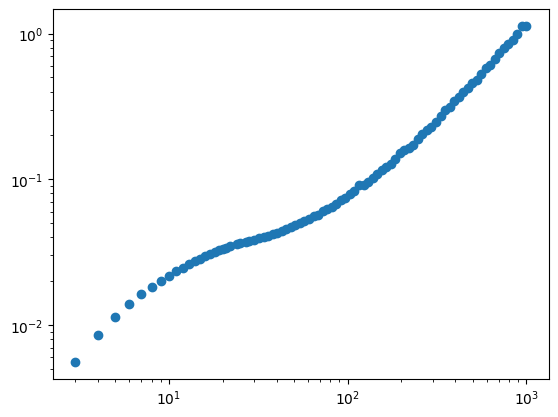

In [ ]:
#MFDFA  https://pypi.org/project/MFDFA/     # too small

# Select a band of lags, which usually ranges from
# very small segments of data, to very long ones, as
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 2

# The order of the polynomial fitting
order = 1

#
y = train_scale['accel_x'].values

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)


# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

# And now we need to fit the line to find the slope. Don't
# forget that since you are plotting in a double logarithmic
# scales, you need to fit the logs of the results
H_hat = np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]

# Now what you should obtain is: slope = H + 1
print('Estimated H = '+'{:.3f}'.format(H_hat[0]))



In [92]:
print(dfa)
print(len(dfa))

[[0.00558229]
 [0.00855686]
 [0.01134634]
 [0.013931  ]
 [0.01623868]
 [0.01834138]
 [0.0201591 ]
 [0.02183362]
 [0.0233635 ]
 [0.02479512]
 [0.02611057]
 [0.02739491]
 [0.02855702]
 [0.02976361]
 [0.03073732]
 [0.03180062]
 [0.03254679]
 [0.03334449]
 [0.03395387]
 [0.03461019]
 [0.03571637]
 [0.03628033]
 [0.03716618]
 [0.03757264]
 [0.03851623]
 [0.03944875]
 [0.04017392]
 [0.04112358]
 [0.04220012]
 [0.0430696 ]
 [0.04446007]
 [0.04530775]
 [0.04684195]
 [0.04850711]
 [0.05028458]
 [0.05135241]
 [0.05379214]
 [0.05576541]
 [0.05729947]
 [0.06065259]
 [0.06243063]
 [0.06503088]
 [0.06787615]
 [0.07151176]
 [0.07478755]
 [0.07868133]
 [0.08306036]
 [0.09153645]
 [0.09199054]
 [0.09602404]
 [0.10158049]
 [0.10828772]
 [0.11543097]
 [0.12222376]
 [0.12719618]
 [0.13817834]
 [0.15125299]
 [0.15777126]
 [0.16418165]
 [0.17107183]
 [0.18811417]
 [0.205362  ]
 [0.21711946]
 [0.22777907]
 [0.24843807]
 [0.26986189]
 [0.29778388]
 [0.31298383]
 [0.34445905]
 [0.3664943 ]
 [0.39611333]
 [0.42

The idea:
"In each bin, a least squares regression
is fit and subtracted within each window. Residuals are squared and
averaged within each window. Then, the square root is taken of the
average squared residual across all windows of a given size. This
process repeats for larger window sizes, growing by, say a power of 2,
up to $N/4$, where $N$ is the length of the series. In a final step, the
logarithm of those scaled root mean squared residuals (i.e.,
fluctuations) is regressed on the logarithm of window sizes. " 

https://github.com/travisjwiltshire/fractal_regression_manuscript/blob/main/fractal_regression_paper_brm.Rmd

The attempt of implentation:

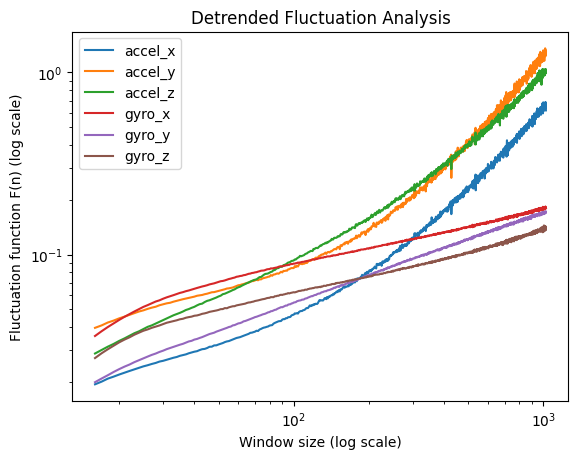

In [94]:
#DFA on all accel_x_y_z gyro_x_y_z, window size changes, same transformations for val and test 

def detrended_fluctuation_analysis(time_series, min_window=16, max_window=1024):                        # start function
    N = len(time_series)                                                                                # length                                                                                           
    time_series_cumsum = np.cumsum(time_series - np.mean(time_series))                                  # Cumulatively sum of the detrended time series                                                                                               
    windows = np.arange(min_window, max_window + 1, step=1)                                             # Window sizes
    F = []                                                                                              # List of fluctuations
    
    for window in windows:
        bins = np.array([time_series_cumsum[i:i + window] for i in range(0, N-window, window)])         # array with bins
                                                                                                        # Detrend each bin and calculate the root mean square fluctuation compared to a polynomial
        rms = [np.sqrt(np.mean(np.square(bin - np.polyval(np.polyfit(np.arange(len(bin)), bin, 1), np.arange(len(bin)))))) for bin in bins]
        F.append(np.mean(rms))                                                                          # add fluctuation to the list
        
    return windows, F

                                                                                                        # apply function on raw (scaled) data
for dat in coordinates: 
    train_scale[f'{dat}_DFA'] = train_scale[dat].values
    windows, F = detrended_fluctuation_analysis(train_scale[f'{dat}_DFA'])

    plt.loglog(windows, F, label=dat)

# Finalizing the plot
plt.xlabel('Window size (log scale)')
plt.ylabel('Fluctuation function F(n) (log scale)')
plt.title('Detrended Fluctuation Analysis')
plt.legend()
plt.show()



In [93]:
print(train_scale['accel_x_DFA'])

360       0.540486
361       0.537285
362       0.515404
363       0.515882
364       0.536061
            ...   
577447    0.511926
577448    0.518131
577449    0.547254
577450    0.563419
577451    0.556585
Name: accel_x_DFA, Length: 577092, dtype: float64


In [ ]:
print

In [ ]:
'''from scipy.stats import linregress'''


In [26]:
                                                                    # apply DFA on train data 
'''for dat in coordinates: 
    train_scale[f'{dat}_DFA'] = train_scale[dat].values
    windows, F = detrended_fluctuation_analysis(train_scale[f'{dat}_DFA'])


    plt.loglog(windows, F, label=dat)

                                                                    # plot of DFA for 6 time series (train data)
plt.xlabel('Window size (log scale)')
plt.ylabel('Fluctuation function F(n) (log scale)')
plt.title('Detrended Fluctuation Analysis')
plt.legend()
plt.show()'''


"for dat in coordinates: \n    train_scale[f'{dat}_DFA'] = train_scale[dat].values\n    windows, F = detrended_fluctuation_analysis(train_scale[f'{dat}_DFA'])\n\n\n    plt.loglog(windows, F, label=dat)\n\n# plot of DFA for 6 time series (train data)\nplt.xlabel('Window size (log scale)')\nplt.ylabel('Fluctuation function F(n) (log scale)')\nplt.title('Detrended Fluctuation Analysis')\nplt.legend()\nplt.show()"

In [ ]:
print(train_scale.describe())                       # 56 columns

                user     timestamp        accel_x        accel_y  \
count  577452.000000  5.774520e+05  577452.000000  577452.000000   
mean     1622.815373  4.756829e+14       0.530566       0.696437   
std        14.166329  4.776322e+14       0.037446       0.095000   
min      1600.000000  2.907196e+11       0.000000       0.000000   
25%      1611.000000  1.231121e+14       0.508622       0.615172   
50%      1623.000000  2.600691e+14       0.529690       0.687950   
75%      1633.000000  7.110781e+14       0.552274       0.780269   
max      1650.000000  1.819727e+15       1.000000       1.000000   

             accel_z         gyro_x         gyro_y         gyro_z  \
count  577452.000000  577452.000000  577452.000000  577452.000000   
mean        0.520620       0.505308       0.581510       0.622121   
std         0.052546       0.035051       0.024160       0.027251   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.495836       0.496754       

In [ ]:
                                                                    # DFA for validation set 

for dat in coordinates: 
    val_scale[f'{dat}_DFA'] = val_scale[dat].values
    windows, F = detrended_fluctuation_analysis(val_scale[f'{dat}_DFA'])

In [40]:
                                                                    # DFA for test set

for dat in coordinates: 
    test_scale[f'{dat}_DFA'] = test_scale[dat].values
    windows, F = detrended_fluctuation_analysis(test_scale[f'{dat}_DFA'])

# checks
missing, shape, describe

In [41]:
                                                                    # check train, val, test shape
print(train_scale.shape)
print(val_scale.shape)
print(test_scale.shape)



(577452, 57)
(192541, 57)
(192605, 57)


In [42]:
missi2=train_scale.isnull().sum()
print(missi2)

user                     0
activity                 0
timestamp                0
accel_x                  0
accel_y                  0
accel_z                  0
gyro_x                   0
gyro_y                   0
gyro_z                   0
accel_x_mean_rol       119
accel_y_mean_rol       119
accel_z_mean_rol       119
gyro_x_mean_rol        119
gyro_y_mean_rol        119
gyro_z_mean_rol        119
accel_x_std_rol        119
accel_y_std_rol        119
accel_z_std_rol        119
gyro_x_std_rol         119
gyro_y_std_rol         119
gyro_z_std_rol         119
accel_x_SpecEnt_rol    119
accel_y_SpecEnt_rol    119
accel_z_SpecEnt_rol    119
gyro_x_SpecEnt_rol     119
gyro_y_SpecEnt_rol     119
gyro_z_SpecEnt_rol     119
accel_x_var_rol        119
accel_y_var_rol        119
accel_z_var_rol        119
gyro_x_var_rol         119
gyro_y_var_rol         119
gyro_z_var_rol         119
accel_x_skew_rol       119
accel_y_skew_rol       119
accel_z_skew_rol       119
gyro_x_skew_rol        119
g

# exclude missings due to windowing

In [47]:
train_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577332 entries, 120 to 577451
Data columns (total 57 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user                 577332 non-null  int64  
 1   activity             577332 non-null  object 
 2   timestamp            577332 non-null  int64  
 3   accel_x              577332 non-null  float64
 4   accel_y              577332 non-null  float64
 5   accel_z              577332 non-null  float64
 6   gyro_x               577332 non-null  float64
 7   gyro_y               577332 non-null  float64
 8   gyro_z               577332 non-null  float64
 9   accel_x_mean_rol     577332 non-null  float64
 10  accel_y_mean_rol     577332 non-null  float64
 11  accel_z_mean_rol     577332 non-null  float64
 12  gyro_x_mean_rol      577332 non-null  float64
 13  gyro_y_mean_rol      577332 non-null  float64
 14  gyro_z_mean_rol      577332 non-null  float64
 15  accel_x_std_rol

In [ ]:
                                                                      # drop first 120 because of window transforming some values are left 
train_scale=train_scale.iloc[120:]
val_scale=val_scale.iloc[120:]
test_scale = test_scale.iloc[120:]
                                    
                                 
                                                                      # to check ratio to train data 
print((120 / len(train_scale)) * 100 )
print((120 / len(test_data)) * 100   )                                # and test
                                                                      # removing produced missings is < 0.1% prozent of training and test data

0.020793911542700296
0.06230367851301887


In [ ]:
print(train_scale.shape)                                               # look at shapes - same amount features (57)
print(val_scale.shape)
print(test_scale.shape)

(577332, 57)
(192421, 57)
(192485, 57)


In [36]:
train_scale.describe()

,user,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,accel_x_mean_rol,accel_y_mean_rol,...,accel_z_SpecEnt_rol,gyro_x_SpecEnt_rol,gyro_y_SpecEnt_rol,gyro_z_SpecEnt_rol,accel_x_DFA,accel_y_DFA,accel_z_DFA,gyro_x_DFA,gyro_y_DFA,gyro_z_DFA
count,577332.000000,5.773320e+05,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,...,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000
mean,1622.820116,4.757293e+14,0.530568,0.696412,0.520619,0.505307,0.581510,0.622121,0.464416,0.485473,...,0.470323,0.670981,0.696903,0.668401,0.530568,0.696412,0.520619,0.505307,0.581510,0.622121
std,14.163981,4.776710e+14,0.037449,0.094991,0.052550,0.035053,0.024162,0.027253,0.197758,0.331711,...,0.346178,0.158073,0.148400,0.149612,0.037449,0.094991,0.052550,0.035053,0.024162,0.027253
min,1600.000000,2.907196e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1611.000000,1.231106e+14,0.508620,0.615164,0.495833,0.496759,0.576420,0.616766,0.354086,0.155624,...,0.024493,0.592139,0.615688,0.588965,0.508620,0.615164,0.495833,0.496759,0.576420,0.616766
50%,1623.000000,2.600715e+14,0.529694,0.687899,0.518119,0.505498,0.581580,0.622254,0.457168,0.420497,...,0.581970,0.699291,0.731848,0.695845,0.529694,0.687899,0.518119,0.505498,0.581580,0.622254
75%,1633.000000,7.110826e+14,0.552279,0.780176,0.546240,0.513978,0.586402,0.627704,0.585647,0.890439,...,0.790512,0.784574,0.806560,0.775569,0.552279,0.780176,0.546240,0.513978,0.586402,0.627704
max,1650.000000,1.819727e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Baseline model

In [51]:
from sklearn.naive_bayes import GaussianNB                                                              # Naive Bayes
from sklearn.svm import SVC                                                                             # SVM
from sklearn.neighbors import KNeighborsClassifier                                                      # kNN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score                     # evaluation
from sklearn.inspection import permutation_importance                                                   # feature importance (Naive Bayes)

In [52]:
                                                                                                        
X_train = train_scale.drop('activity',axis=1)                                                           #  raw and transformed time series for X_train 
y_train = train_scale['activity']                                                                       # set label for training data
X_val = val_scale.drop('activity', axis=1)                                                              # set label and data for validation set    
y_val = val_scale['activity']
X_test = test_scale.drop('activity', axis=1)                                                            # set label and data for test set
y_test = test_scale['activity']


sample_sizetrain=int(len(X_train)*0.5)                                                                 # sample_size for train (X_train or y_train can be used to indicate length)


# Naive Bayes

In [ ]:
modelNB = GaussianNB()                                                  # load model
modelNB.fit(X_train, y_train)                                           # fit model on trainingsdata

predictions = modelNB.predict(X_val)                                    # predict on validation data

accuracy = accuracy_score(y_val, predictions)                           # calculate accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')                               # print results
print(classification_report(y_val, predictions))

Accuracy: 18.26%


c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00     30066
           B       0.00      0.00      0.00     30807
           C       0.18      0.64      0.28     32090
           D       0.19      0.41      0.26     36068
           E       0.00      0.00      0.00     33018
           M       0.00      0.00      0.00     30132

    accuracy                           0.18    192181
   macro avg       0.06      0.17      0.09    192181
weighted avg       0.07      0.18      0.10    192181



c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# feature importance score

In [ ]:
                                                                # found the idea on https://stackoverflow.com/questions/62933365/how-to-get-the-feature-importance-in-gaussian-naive-bayes
imps = permutation_importance(modelNB, X_val, y_val)            #caclulate importance for the model for the training data
print(imps.importances_mean)

[0.         0.00741697 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


# kNN

In [ ]:

modelkNN=KNeighborsClassifier(n_neighbors=3)                    # model 
modelkNN.fit(X_train, y_train)                                  # model fit

predictions = modelkNN.predict(X_val)                           # predict

accuracy = accuracy_score(y_val, predictions)                   # calculate accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')                       # print
print(classification_report(y_val, predictions))

#run time onder 4 minutes for accuracy of .94

c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Accuracy: 94.29%
              precision    recall  f1-score   support

           A       0.94      0.94      0.94     30066
           B       0.98      0.93      0.95     30807
           C       0.94      0.94      0.94     32090
           D       0.93      0.96      0.95     36068
           E       0.96      0.98      0.97     33018
           M       0.92      0.89      0.90     30132

    accuracy                           0.94    192181
   macro avg       0.94      0.94      0.94    192181
weighted avg       0.94      0.94      0.94    192181



feature importance

In [56]:
from sklearn.tree import DecisionTreeClassifier


In [57]:
                                                                # Decision tree for feature ranking

                                                                # Create and fit the model
modelDT = DecisionTreeClassifier(random_state=42)
modelDT.fit(X_train, y_train)
                                                                # Make predictions
predictions = modelDT.predict(X_val)

                                                                # Calculate model accuracy
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

                                                                # calculate rank features
feature_importances = modelDT.feature_importances_

                                                                # Create a DataFrame
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

                                                                # Print ranked features
print("\nRanked Features:")
print(importance_df)

Accuracy: 87.98%

Ranked Features:
                Feature  Importance
27      accel_y_var_rol    0.320551
46      accel_z_rms_rol    0.140402
39     accel_y_kurt_rol    0.070221
45      accel_y_rms_rol    0.048284
20  accel_x_SpecEnt_rol    0.046481
1             timestamp    0.043257
12      gyro_y_mean_rol    0.032992
43      gyro_z_kurt_rol    0.022887
21  accel_y_SpecEnt_rol    0.015369
8      accel_x_mean_rol    0.014967
9      accel_y_mean_rol    0.014706
10     accel_z_mean_rol    0.014505
44      accel_x_rms_rol    0.014495
33     accel_y_skew_rol    0.014399
38     accel_x_kurt_rol    0.013911
47       gyro_x_rms_rol    0.012980
0                  user    0.012749
26      accel_x_var_rol    0.012702
41      gyro_x_kurt_rol    0.012225
19       gyro_z_std_rol    0.010847
24   gyro_y_SpecEnt_rol    0.010411
14      accel_x_std_rol    0.008904
23   gyro_x_SpecEnt_rol    0.006421
16      accel_z_std_rol    0.006407
17       gyro_x_std_rol    0.006274
22  accel_z_SpecEnt_rol    0.

In [58]:
                                                        # select features
selfea = importance_df['Feature'][:6].tolist()          # create list with 6 feature names
selfea10 = importance_df['Feature'][:10].tolist()       # create list with 10 feature names
print(selfea)
print(selfea10)

['accel_y_var_rol', 'accel_z_rms_rol', 'accel_y_kurt_rol', 'accel_y_rms_rol', 'accel_x_SpecEnt_rol', 'timestamp']
['accel_y_var_rol', 'accel_z_rms_rol', 'accel_y_kurt_rol', 'accel_y_rms_rol', 'accel_x_SpecEnt_rol', 'timestamp', 'gyro_y_mean_rol', 'gyro_z_kurt_rol', 'accel_y_SpecEnt_rol', 'accel_x_mean_rol']


# SVM on selected features 
because runs longer than kNN and NB is not helping in selecting features

In [ ]:

modelSVM=SVC(kernel='linear')                                                   #SVM with linear kernel
modelSVM.fit(X_train[selfea][:sample_sizetrain], y_train[sample_sizetrain])

predictions = modelSVM.predict(X_val[selfea])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
# sample .1 and running longer than kNN on full set with same variables (9min) was stopped after 545min with 6 features 
# (smaple size .1) running time is under 1 minute (60%accuracy)
# running on 10 features (and sample size of .1= was stopped after 185min)

print('classification report: ')
print(classification_report(y_val,predictions))

Accuracy: 69.20%
classification report: 
              precision    recall  f1-score   support

           A       0.55      0.66      0.60     30306
           B       0.78      0.92      0.84     30807
           C       0.53      0.29      0.37     32090
           D       0.68      0.88      0.77     36068
           E       0.88      0.72      0.79     33018
           M       0.71      0.67      0.69     30132

    accuracy                           0.69    192421
   macro avg       0.69      0.69      0.68    192421
weighted avg       0.69      0.69      0.68    192421



# kNN on selected features

In [ ]:
modelkNN2=KNeighborsClassifier(n_neighbors=3)                           # kNN slected features 3 neighbors
modelkNN2.fit(X_train[selfea], y_train)

predictions = modelkNN2.predict(X_val[selfea])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_val, predictions))



Accuracy: 94.29%
              precision    recall  f1-score   support

           A       0.94      0.94      0.94     30066
           B       0.98      0.93      0.95     30807
           C       0.94      0.94      0.94     32090
           D       0.93      0.96      0.95     36068
           E       0.96      0.98      0.97     33018
           M       0.92      0.89      0.90     30132

    accuracy                           0.94    192181
   macro avg       0.94      0.94      0.94    192181
weighted avg       0.94      0.94      0.94    192181



1,3,7, neighbors for kNN

In [ ]:
modelkNN3=KNeighborsClassifier(n_neighbors=1)                       # kNN selected features, neighbor = 1 
modelkNN3.fit(X_train[selfea], y_train)

predictions = modelkNN3.predict(X_val[selfea])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
#print(classification_report(y_val, predictions))                   # for more details on evaluation

Accuracy: 94.27%


In [ ]:
modelkNN4=KNeighborsClassifier(n_neighbors=5)                       # kNN selected features, neighbors = 5
modelkNN4.fit(X_train[selfea], y_train)

predictions = modelkNN4.predict(X_val[selfea])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
#print(classification_report(y_val, predictions))                   # for more details on evaluation

Accuracy: 94.31%


In [ ]:
modelkNN5=KNeighborsClassifier(n_neighbors=7)                       # kNN selected features, neighbors = 7
modelkNN5.fit(X_train[selfea], y_train)

predictions = modelkNN5.predict(X_val[selfea])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
#print(classification_report(y_val, predictions))                   # for more details on evaluation

Accuracy: 94.33%


In [ ]:
modelkNN6=KNeighborsClassifier(n_neighbors=10)          
modelkNN6.fit(X_train[selfea], y_train)

predictions = modelkNN6.predict(X_val[selfea])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
#print(classification_report(y_val, predictions))                   # for more details on evaluation


# best model performance with k = 10 and selected features, running time with 5.6 seconcs fast (94%)

Accuracy: 94.37%


# Run on Test data


In [64]:
# Naive Bayes
predictions = modelNB.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, predictions))

Accuracy: 18.26%


c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00     30077
           B       0.00      0.00      0.00     30817
           C       0.18      0.64      0.28     32100
           D       0.19      0.41      0.26     36079
           E       0.00      0.00      0.00     33027
           M       0.00      0.00      0.00     30145

    accuracy                           0.18    192245
   macro avg       0.06      0.17      0.09    192245
weighted avg       0.07      0.18      0.10    192245



c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
# kNN 
predictions = modelkNN.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, predictions))


Accuracy: 78.08%
              precision    recall  f1-score   support

           A       0.81      0.55      0.66     30077
           B       0.67      0.86      0.75     30817
           C       0.92      0.86      0.89     32100
           D       0.85      0.59      0.70     36079
           E       0.68      0.98      0.80     33027
           M       0.85      0.86      0.86     30145

    accuracy                           0.78    192245
   macro avg       0.80      0.78      0.78    192245
weighted avg       0.80      0.78      0.78    192245



In [66]:
# kNN on selected features (n = 6) (best model)
modelkNN2=KNeighborsClassifier(n_neighbors=3)
modelkNN2.fit(X_train[selfea], y_train)


predictionskNN2 = modelkNN2.predict(X_test[selfea])

accuracy = accuracy_score(y_test, predictionskNN2)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, predictionskNN2))


Accuracy: 78.08%
              precision    recall  f1-score   support

           A       0.81      0.55      0.66     30077
           B       0.67      0.86      0.75     30817
           C       0.92      0.86      0.89     32100
           D       0.85      0.59      0.70     36079
           E       0.68      0.98      0.80     33027
           M       0.85      0.86      0.86     30145

    accuracy                           0.78    192245
   macro avg       0.80      0.78      0.78    192245
weighted avg       0.80      0.78      0.78    192245



In [67]:
# kNN on selected features (n = 6) (best model)
modelkNN2=KNeighborsClassifier(n_neighbors=10)
modelkNN2.fit(X_train[selfea], y_train)


predictionskNN2 = modelkNN2.predict(X_test[selfea])

accuracy = accuracy_score(y_test, predictionskNN2)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, predictionskNN2))
#78.05 for 3 78,66 for 7, should be tested on the test set. 

Accuracy: 78.21%
              precision    recall  f1-score   support

           A       0.81      0.55      0.66     30077
           B       0.68      0.86      0.75     30817
           C       0.92      0.86      0.89     32100
           D       0.85      0.60      0.70     36079
           E       0.69      0.98      0.81     33027
           M       0.85      0.86      0.86     30145

    accuracy                           0.78    192245
   macro avg       0.80      0.78      0.78    192245
weighted avg       0.80      0.78      0.78    192245



In [ ]:
# kNN on selected features (n = 10)
modelkNN2=KNeighborsClassifier(n_neighbors=3)
modelkNN2.fit(X_train[selfea10], y_train)

predictions = modelkNN2.predict(X_test[selfea10])

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, predictions))
#78.04% for k=3
#78.18%  for k=10

Accuracy: 78.04%
              precision    recall  f1-score   support

           A       0.81      0.55      0.66     30317
           B       0.67      0.85      0.75     30817
           C       0.92      0.86      0.89     32100
           D       0.85      0.59      0.70     36079
           E       0.68      0.98      0.80     33027
           M       0.85      0.86      0.86     30145

    accuracy                           0.78    192485
   macro avg       0.80      0.78      0.78    192485
weighted avg       0.80      0.78      0.78    192485



In [ ]:
# SVM (trainend on sample n=.5 (? not added to X_test) and selected features n =6)

predictions = modelSVM.predict(X_test[selfea][:sample_size])

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, predictions))


Accuracy: 67.46%
              precision    recall  f1-score   support

           A       0.53      0.63      0.57     30317
           B       0.77      0.90      0.83     30817
           C       0.48      0.28      0.35     32100
           D       0.67      0.88      0.76     36079
           E       0.91      0.72      0.80     33027
           M       0.66      0.62      0.64     30145

    accuracy                           0.67    192485
   macro avg       0.67      0.67      0.66    192485
weighted avg       0.67      0.67      0.66    192485



In [ ]:
# SVM (trainend on sample .5 and selected features = 10)
'''
modelSVM2=SVC(kernel='linear')
modelSVM2.fit(X_train[selfea10][:sample_size], y_train[:sample_size])

predictions = modelSVM2.predict(X_test[selfea10][:sample_size])

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, predictions))
# >300min'''#>800min>3377min

test dt on test for feature ranking

In [ ]:
# Create and fit the model
modelDT = DecisionTreeClassifier(random_state=42)
modelDT.fit(X_train, y_train)

# Make predictions
predictions = modelDT.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, predictions))

# Obtain feature importances
feature_importances = modelDT.feature_importances_

# Create a DataFrame to rank features
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print ranked features
print("\nRanked Features:")
print(importance_df)

#run time 175 minutes for .85

Accuracy: 85.43%
              precision    recall  f1-score   support

           A       0.86      0.79      0.82     30317
           B       0.87      0.87      0.87     30817
           C       0.75      0.81      0.78     32100
           D       0.91      0.90      0.91     36079
           E       0.93      0.93      0.93     33027
           M       0.80      0.81      0.80     30145

    accuracy                           0.85    192485
   macro avg       0.85      0.85      0.85    192485
weighted avg       0.86      0.85      0.85    192485


Ranked Features:
                Feature  Importance
21      accel_y_var_rol    0.182845
40      accel_z_rms_rol    0.141509
15      accel_y_std_rol    0.140494
33     accel_y_kurt_rol    0.070396
39      accel_y_rms_rol    0.047314
44  accel_x_SpecEnt_rol    0.046604
1             timestamp    0.042596
12      gyro_y_mean_rol    0.032995
37      gyro_z_kurt_rol    0.022743
45  accel_y_SpecEnt_rol    0.015370
8      accel_x_mean_rol   

In [ ]:
# Create and fit the model
modelDT3 = DecisionTreeClassifier(random_state=42)
modelDT3.fit(X_train[selfea], y_train)

# Make predictions
predictionsDT3 = modelDT3.predict(X_test[selfea])

# Calculate accuracy
accuracy = accuracy_score(y_test, predictionsDT3)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, predictionsDT3))

#83% for selfea10
#77% for selfea

Accuracy: 76.96%
              precision    recall  f1-score   support

           A       0.75      0.68      0.71     30317
           B       0.86      0.85      0.85     30817
           C       0.60      0.64      0.62     32100
           D       0.87      0.83      0.85     36079
           E       0.83      0.88      0.86     33027
           M       0.70      0.72      0.71     30145

    accuracy                           0.77    192485
   macro avg       0.77      0.77      0.77    192485
weighted avg       0.77      0.77      0.77    192485



# Visualizing results

In [ ]:
# confusion matrix heatmap


In [58]:
import seaborn as sns

Confusion Matrix: 
[[21598  3591  2949   597   165  1417]
 [  765 27385  2088   158    23   398]
 [ 1769  1375 26011   836   320  1789]
 [  271   314   985 30708  3221   580]
 [  253    77   344  1732 29649   972]
 [ 1510   418  2296   671  1128 24122]]


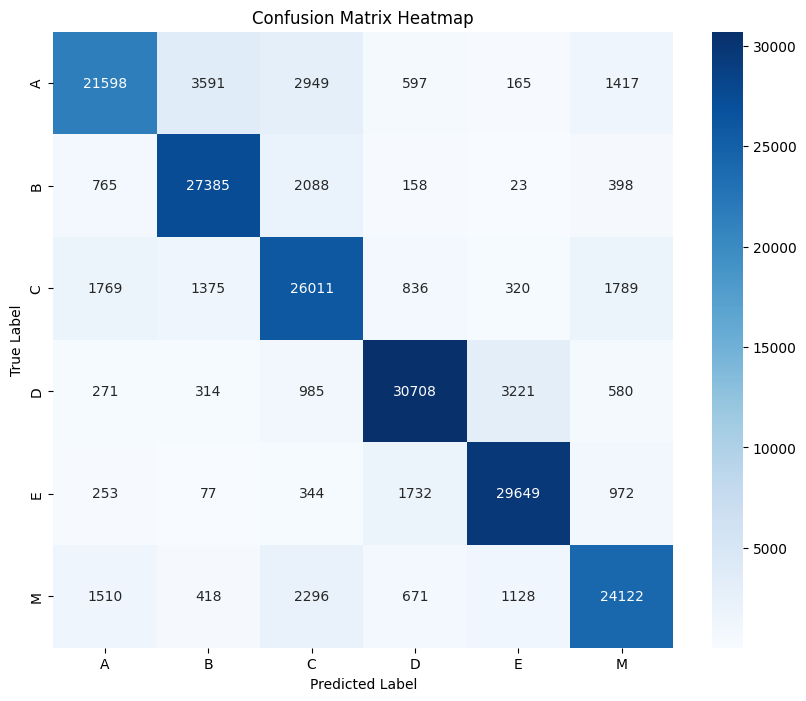

In [105]:
#confusion matrix for decision tree on test set, features=10
print('Confusion Matrix: ')
cm = confusion_matrix(y_test,predictionsDT3)
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [102]:
print(classification_report(y_test, predictionskNN2))

              precision    recall  f1-score   support

           A       0.73      0.75      0.74     30317
           B       0.86      0.88      0.87     30817
           C       0.63      0.64      0.64     32100
           D       0.90      0.86      0.88     36079
           E       0.88      0.88      0.88     33027
           M       0.72      0.72      0.72     30145

    accuracy                           0.79    192485
   macro avg       0.79      0.79      0.79    192485
weighted avg       0.79      0.79      0.79    192485



Confusion Matrix: 
[[22589   894  4452   173   193  2016]
 [ 1069 27200  1701   175   152   520]
 [ 4706  2439 20558   534   212  3651]
 [  371   466  1144 30863  2446   789]
 [   94    10   299  2012 29193  1419]
 [ 2126   506  4353   500   998 21662]]


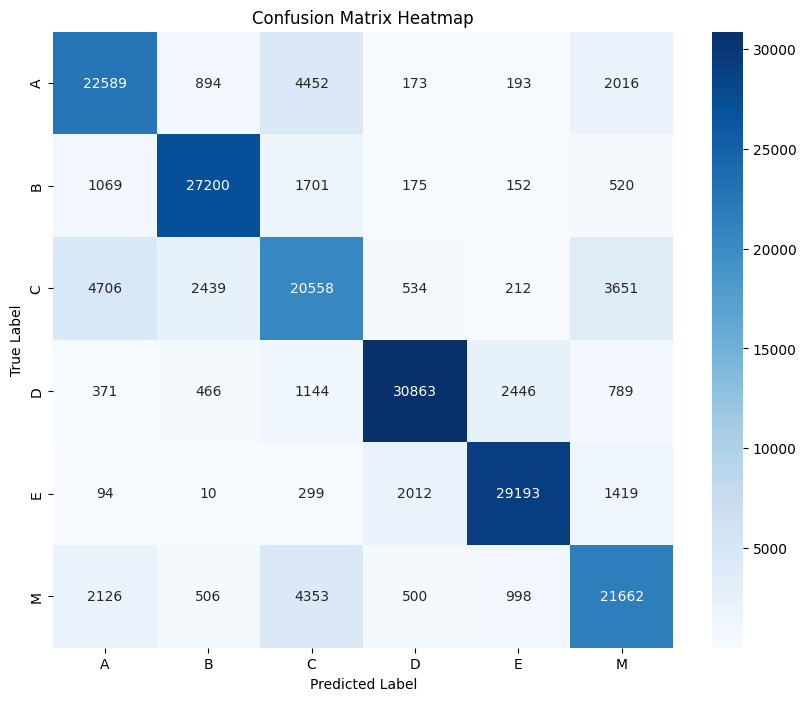

In [ ]:
# confusion matrix for kNN2 feature=6 neighbors=10

print('Confusion Matrix: ')
cm = confusion_matrix(y_test,predictionskNN2)
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

feature importance


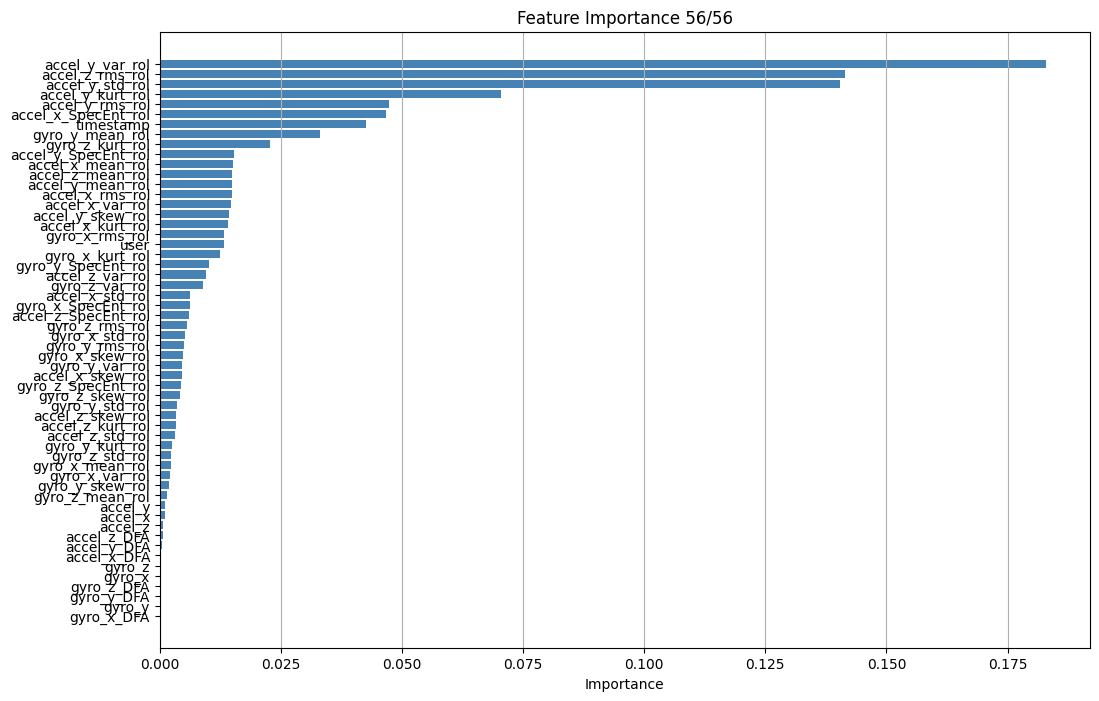

In [60]:
# visualize all features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance 56/56')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.grid(axis='x')
plt.show()

#offener link https://arno.uvt.nl/show.cgi?fid=149145 

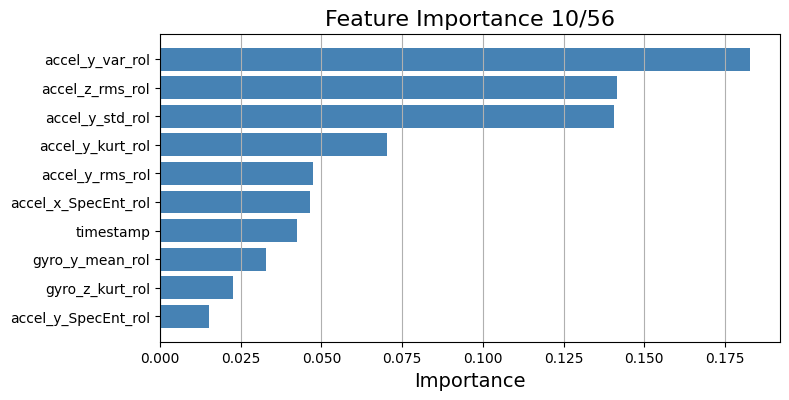

In [61]:
# visualize Top 10 features
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='steelblue')
plt.xlabel('Importance', fontsize=14)
plt.title('Feature Importance 10/56', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.grid(axis='x')
plt.show()

# research on SVM

In [ ]:
from sklearn.model_selection import learning_curve
 

In [ ]:
# the used SVM model

'''modelSVM=SVC(kernel='linear')
modelSVM.fit(X_train[selfea][:sample_size], y_train[:sample_size])

predictions = modelSVM.predict(X_val[selfea])

#print('Confusion Matric:')
#print(confusion_matrix(y_val,predictions))
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
#sample .1 and running longer than kNN on full set with same variables (9min) was stopped after 545min with 6 features (smaple size .1) running time is under 1 minute (60%accuracy)
# running on 10 features (and sample size of .1= was stopped after 185min)

print('classification report: ')
print(classification_report(y_val,predictions))'''